[ 1.00000000e+00 -9.14594075e+02  1.73241161e+05 -7.46607409e-03
  6.66389005e-11]


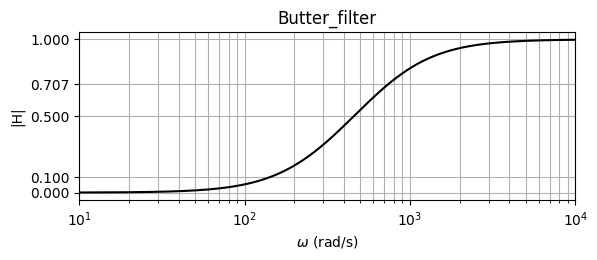

/tmp/ipykernel_221882/643425804.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[m] = C.dot(x) + D*f[m]


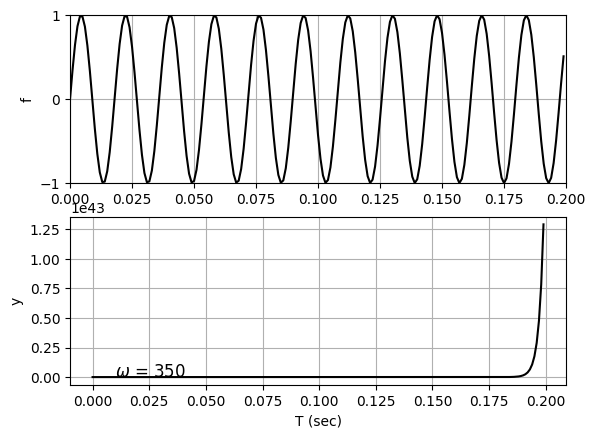

In [3]:
"""Butter_filter.py """
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig
from math import pi, exp, cos, sin, log, sqrt, ceil
""" Two poles """
wc = 350
n=4
offset_start = 180/(2*n)
num1 = [1, 0, 0]
den1 = [1, 2*np.cos(np.deg2rad(offset_start + 0*(180/n)))*wc*-1, wc**-2]
num2 = [1, 0, 0]
den2 = [1, 2*np.cos(np.deg2rad(offset_start + 1*(180/n)))*wc*-1, wc**-2]

num = np.convolve(num1, num2)
den = np.convolve(den1, den2)
print(den)
system = sig.lti(num,den)
steps = 1
w = np.arange(1E1, 1E4+steps, steps)
w, Hmag, Hphase = sig.bode(system, w)


plt.subplot(211)
plt.semilogx(w,10**(0.05*Hmag),'k') # Plot amplitude, not dB.
plt.title('Butter_filter')
#plt.axis([0.1, 10, 0, 1])
plt.yticks([0, 0.1, .5, .707, 1])
plt.grid(which='both')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('|H|')
plt.xlim(1E1, 1E4)
#plt.xticks([.1,.8,1,2,10])
plt.savefig('Butter.png',dpi=300)
plt.show()
dt = 0.001
NN = 200
TT = np.arange(0,NN*dt,dt)
y = np.zeros(NN)
f = np.zeros(NN)
A,B,C,D = sig.tf2ss(num,den)
x = np.zeros(np.shape(B))

""" The sinusodal input """
omega = 350

for n in range(NN):
    f[n] = sin(omega*n*dt)
plt.subplot(211)
plt.plot(TT,f,'k')
plt.yticks([-1, 0, 1 ])
plt.axis([0, NN*dt,-1,1])
plt.grid()
plt.ylabel('f')
for m in range(NN):
    x = x + dt*A.dot(x) + dt*B*f[m]
    y[m] = C.dot(x) + D*f[m]

plt.subplot(212)
plt.plot(TT,y,'k')
#plt.axis([0, NN*dt,-1,1])
#plt.yticks([-1, -.707, 0, .707, 1 ])
plt.text(.01,.5,'$\\omega$ = {}'.format(round(omega,1)),fontsize=12)
plt.grid()
plt.xlabel('T (sec)')
plt.ylabel('y')
#plt.savefig('y_vs_f.png',dps=300)
plt.show()

In [13]:
"""find_n.py"""
def find_n(wp, ws, hp, hs):
    Hp2 = (hp)**2
    npp = np.log10( 1/Hp2 - 1)/(2*np.log10(wp) )
    print('np = ',npp)
    Hs2 = (hs)**2
    ns = np.log10( 1/Hs2 - 1)/(2*np.log10(ws) )
    print('ns = ',ns)
    return npp, ns

wc = 348
wp = 400
ws = 200
hp = .85
wp = 1/(wp/wc)
ws = 1/(ws/wc)
npp, ns = find_n(wp, ws, .85, .15)

np =  3.435596300995961
ns =  3.404571537118835
